Notebook to test interpolation of Predictions and whole datasets from and to the icosahedral grid.

In [3]:
from interpolate import *
from evaluate import *

In [27]:
conditions = {
    "DATASET_DESCRIPTION": {"PRECIP_WEIGHTING": False},  # {"RESULTS_INTERPOLATED": True},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",# {"MODEL_TYPE": "UNet_Flat",
                                   "USE_COORD_CONV": True, 
                                   "USE_CYLINDRICAL_PADDING": True,
                                   "LOSS": "Masked_AreaWeightedMSELoss",
                                   "LEARNING_RATE": 5e-3}
                                   # "RUN_NR": 0}
}

base_folder = "Output/Reproduce_new"
output_folder = "Scripts/"

In [28]:
predictions_list, descriptions_list = load_compatible_available_runs(base_folder, conditions)

30 matching runs found


In [29]:
interpolate_predictions(descriptions_list[0], predictions_list[0], output_folder=base_folder, script_folder=output_folder)

('t', 'level-1_5', 'latitude', 'longitude')
('t', 'latitude', 'longitude')
t
is in dimscopy
longitude
is in dimscopy
latitude
is in dimscopy
level-1_5
{'t': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 't', size = 0, 'longitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 96, 'latitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 73}
['t', 'latitude', 'longitude']
['latitude', 'longitude']



cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.81s 28MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.07s 22MB].


done


cdo    remap: Processed 693792 values from 1 variable over 99 timesteps [0.27s 29MB].
cdo    remap: Processed 693792 values from 1 variable over 99 timesteps [0.07s 25MB].


writing predictions
writing descriptions
done


In [30]:
base_folder = "Output/Reproduce_new"
conditions = {
    "DATASET_DESCRIPTION": {"RESULTS_INTERPOLATED": True},
    "MODEL_TRAINING_DESCRIPTION": {"MODEL_TYPE": "UNet_Flat",# {"MODEL_TYPE": "UNet_Flat",
                                   "USE_COORD_CONV": True, 
                                   "USE_CYLINDRICAL_PADDING": True,
                                   "LOSS": "Masked_AreaWeightedMSELoss",
                                   "LEARNING_RATE": 5e-3}
                                   # "RUN_NR": 0}
}

# base_folder = "Output/Reproduce_new"
# output_folder = "Scripts/"

In [31]:
from evaluate import *

In [32]:
predictions_list, descriptions_list = load_compatible_available_runs(base_folder, conditions)

1 matching runs found


In [34]:
ignore_vars = ["RESULTS_INTERPOLATED", "LATITUDES_SLICE", "LATITUDES", "LONGITUDES", "GRID_SHAPE", "RESOLUTION", "INTERPOLATE_CORNERS", "INTERPOLATION"]


In [35]:
d_reduced = descriptions_list[0]["DATASET_DESCRIPTION"]
for l in ignore_vars:
    d_reduced.pop(l, None)

In [51]:
ds = find_and_load_dataset(descriptions_list[0]["MODEL_TRAINING_DESCRIPTION"]["DATASET_FOLDER"], \
                      d_reduced, use_prints=True)

Difference: GRID_TYPE Original: Flat Condition: Ico
Difference: GRID_TYPE Original: Flat Condition: Ico


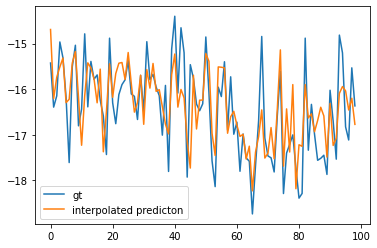

In [59]:
plt.plot(gt[:,200], label="gt")
plt.plot(predictions_list[0][:,200], label="interpolated predicton")
plt.legend()

In [41]:
gt = ds["test"]["targets"].reshape(ds["test"]["targets"].shape[0],-1)

In [43]:
r2 = get_r2(gt, predictions_list[0])

In [44]:
from plotting import *

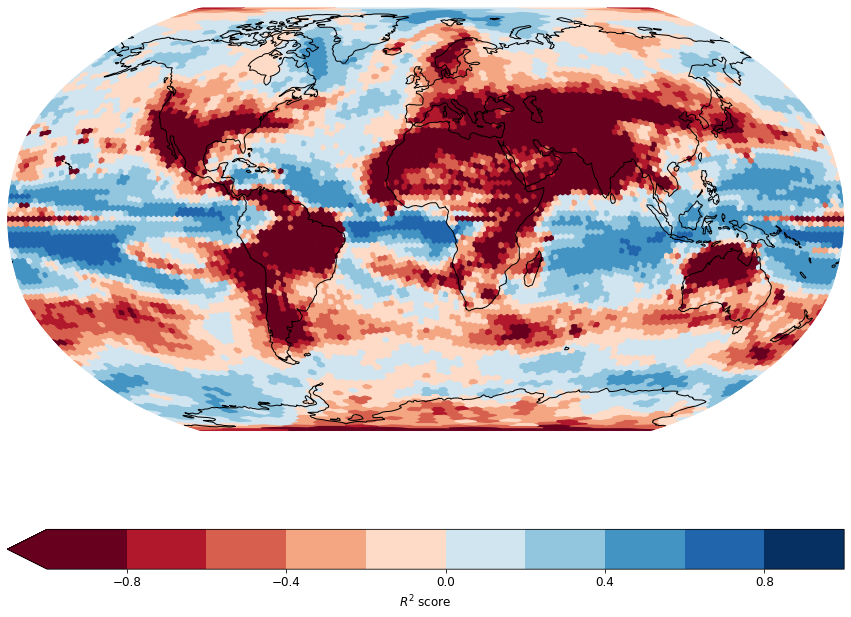

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': r2_style["PROJECTION"]}, figsize=r2_style["FIGSIZE"])

plot_ico_map(ax, r2, {"RESOLUTION": 5}, r2_style)

plt.axis("off")
plt.show()

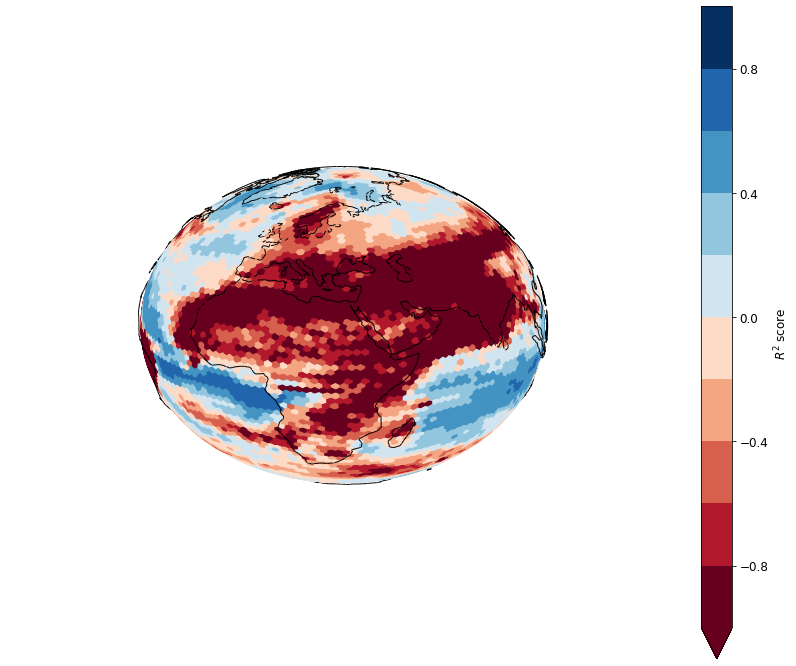

In [48]:
fig = plt.figure(figsize=r2_style["FIGSIZE"])

ax= fig.add_subplot(1,1,1, projection='3d')

plot_map_3d(ax, r2, {"RESOLUTION": 5}, r2_style,azim=30)

plt.axis("off")
plt.show()

# Icosahedral datasets.

In [4]:
for cm in ["iCESM", "iHadCM3", "isoGSM", "GISS", "ECHAM5"]:
    for var_name in ["isotopes", "tsurf", "prec"]:
        interpolate_climate_model_data_to_ico_grid(model_name=cm, variable_name=var_name, script_folder="Scripts/",
                                                       dataset_folder="Datasets/", resolution=5, interpolation="cons1")

cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.78s 28MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 22MB].


done


cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [1.23s 31MB].
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.11s 27MB].


cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.81s 28MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.03s 22MB].


done


cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.84s 31MB].
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.11s 27MB].


cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.77s 28MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 22MB].


done


cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.74s 31MB].
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.10s 28MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6816)


cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.76s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6816)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [1.16s 32MB].
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.06s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid


cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.76s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [1.17s 32MB].
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.06s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid


cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.76s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [1.02s 32MB].
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.06s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6952)


cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.77s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6952)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6972)


done


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6954)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6968)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6993)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6983)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6957)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6972)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6977)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6962)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6991)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6934)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6987)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6968)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6941)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6966)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6978)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6959)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6950)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6975)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6947)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6987)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6998)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6942)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6931)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6938)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6962)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6934)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6969)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6987)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6946)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6995)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6993)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6936)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6943)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6953)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7000)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6975)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6976)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6957)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6950)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6980)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6964)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6944)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6966)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6962)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6932)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6962)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6961)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6961)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6941)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6966)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6984)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6942)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6986)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6951)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6979)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6935)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6962)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6985)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6942)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6941)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6962)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6954)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6980)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6975)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6974)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6963)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6947)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6953)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6970)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6974)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6992)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7000)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6961)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6997)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6974)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6934)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6932)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6963)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6941)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6967)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6952)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6946)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6943)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6967)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6981)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6951)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6966)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6946)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6961)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6972)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6972)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6958)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6962)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6971)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6983)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6973)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6957)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6980)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6947)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6966)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6950)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6963)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6946)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6971)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6962)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6951)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6949)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6990)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6963)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6998)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6965)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6967)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6953)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6992)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6970)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6950)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6928)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6972)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6992)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6954)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6950)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6944)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6971)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6969)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6935)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6960)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6941)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6940)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6956)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6980)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6952)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6936)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6953)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6948)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6938)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6971)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6980)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6977)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6949)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6978)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6955)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6949)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6959)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6962)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6934)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6949)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6980)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6973)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6944)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6976)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6955)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6940)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6984)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6933)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6983)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6952)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6964)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6978)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6973)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6975)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6931)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6971)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6969)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6933)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6963)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6976)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6965)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6971)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6963)
cdo    remap: YAC first 

cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.74s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.66s 33MB].
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.08s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid


cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.75s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.67s 32MB].
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.08s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid


cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.74s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7006)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7002)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7006)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7005)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7002)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7006)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7006)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7004)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6996)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7000)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6998)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7004)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6997)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7006)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7001)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6999)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6999)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6992)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6988)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6999)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6989)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6991)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6988)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7006)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6981)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6985)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6988)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6986)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (7002)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6995)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6984)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6989)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6974)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6975)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6975)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6977)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6987)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6975)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6974)
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [176.16s 36MB].
cdo    remap: YAC first order cons

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6995)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6995)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6999)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6996)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6997)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7006)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (7005)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6996)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6983)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6979)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6992)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6982)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6980)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6990)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6992)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6986)
cdo    remap: YAC first 

cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.73s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.64s 32MB].
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.06s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid


cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.73s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.66s 33MB].
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.05s 28MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6949)


cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.73s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6949)
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6927)


done


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6920)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6920)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6918)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6933)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6956)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6970)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6941)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6922)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6949)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6939)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6909)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6946)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6916)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6927)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6949)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6974)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6931)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6951)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6916)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6938)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6926)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6952)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6915)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6918)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6969)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6954)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6946)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6943)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6908)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6926)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6957)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6932)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6914)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6929)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6962)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6915)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6915)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6930)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6918)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6976)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6940)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6924)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6900)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6944)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6911)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6925)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6950)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6921)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6934)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6972)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6929)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6919)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6955)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6933)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6934)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6934)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6922)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6943)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6905)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6922)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6929)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6929)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6928)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6922)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6937)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6910)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6970)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6916)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6953)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6967)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6951)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6942)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6911)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6921)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6929)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6942)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6904)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6945)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6956)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6896)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6904)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6940)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6930)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6926)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6950)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6913)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6948)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6972)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6940)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6909)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6963)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6936)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6923)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6914)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6944)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6938)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6943)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6914)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6939)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6982)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6931)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6946)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6958)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6947)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6941)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6953)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6931)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6906)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6978)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6925)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6906)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6957)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6924)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6929)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6968)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6967)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6935)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6925)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6935)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6924)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6913)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6957)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6944)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid, with source mask (6930)


cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6947)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6933)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6904)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6943)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6935)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6923)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6942)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6930)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6947)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6916)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6921)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6926)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6913)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6923)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6976)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6955)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6922)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6951)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6929)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6937)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6932)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6960)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6935)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6937)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6934)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6960)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6929)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6950)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6928)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6930)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6952)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6926)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6959)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6934)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6932)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6911)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6944)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6949)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6956)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6937)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6967)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6940)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6957)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6921)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6942)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6921)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6939)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6947)
cdo    remap: YAC first 

cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6939)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6907)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6920)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6934)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6907)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6922)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6933)
cdo    remap: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid, with source mask (6929)
cdo    remap: YAC first 

cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.75s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.62s 33MB].
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.05s 29MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10230) grid


cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.75s 30MB].
cdo    gencon: YAC first order conservative weights from lonlat (96x73) to unstructured (10) grid
cdo    gencon: Processed 7008 values from 1 variable over 1 timestep [0.02s 25MB].


done


cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.62s 33MB].
cdo    remap: Processed 7008000 values from 1 variable over 1000 timesteps [0.05s 29MB].
